# Dados em Formato Largo vs. Longo

## Sobre os dados
Neste notebook, usaremos dados diários de temperatura do [National Centers for Environmental Information (NCEI) API](https://www.ncdc.noaa.gov/cdo-web/webservices/v2). Usaremos o conjunto de dados Global Historical Climatology Network - Daily (GHCND) para a estação Boonton 1 (GHCND:USC00280907); veja a documentação [aqui](https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf).

*Nota: O NCEI faz parte da National Oceanic and Atmospheric Administration (NOAA) e, como você pode ver pela URL da API, esse recurso foi criado quando o NCEI era chamado de NCDC. Caso a URL desse recurso mude no futuro, você pode procurar por "NCEI weather API" para encontrar a versão atualizada.*

## Configuração

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

wide_df = pd.read_csv('data/wide_data.csv', parse_dates=['date'])
long_df = pd.read_csv(
    'data/long_data.csv', 
    usecols=['date', 'datatype', 'value'], 
    parse_dates=['date']
)[['date', 'datatype', 'value']] # sort columns

## Formato Largo
Nossas variáveis têm cada uma sua própria coluna:

In [2]:
wide_df.head(6)

,date,TMAX,TMIN,TOBS
0,2018-10-01,21.1,8.9,13.9
1,2018-10-02,23.9,13.9,17.2
2,2018-10-03,25.0,15.6,16.1
3,2018-10-04,22.8,11.7,11.7
4,2018-10-05,23.3,11.7,18.9
5,2018-10-06,20.0,13.3,16.1


Descrever todas as colunas é fácil:

In [4]:
wide_df.describe(include='all')

,date,TMAX,TMIN,TOBS
count,31,31.000000,31.000000,31.000000
mean,2018-10-16 00:00:00,16.829032,7.561290,10.022581
min,2018-10-01 00:00:00,7.800000,-1.100000,-1.100000
25%,2018-10-08 12:00:00,12.750000,2.500000,5.550000
50%,2018-10-16 00:00:00,16.100000,6.700000,8.300000
75%,2018-10-23 12:00:00,21.950000,13.600000,16.100000
max,2018-10-31 00:00:00,26.700000,17.800000,21.700000
std,NaN,5.714962,6.513252,6.596550


É fácil criar gráficos com `pandas`:

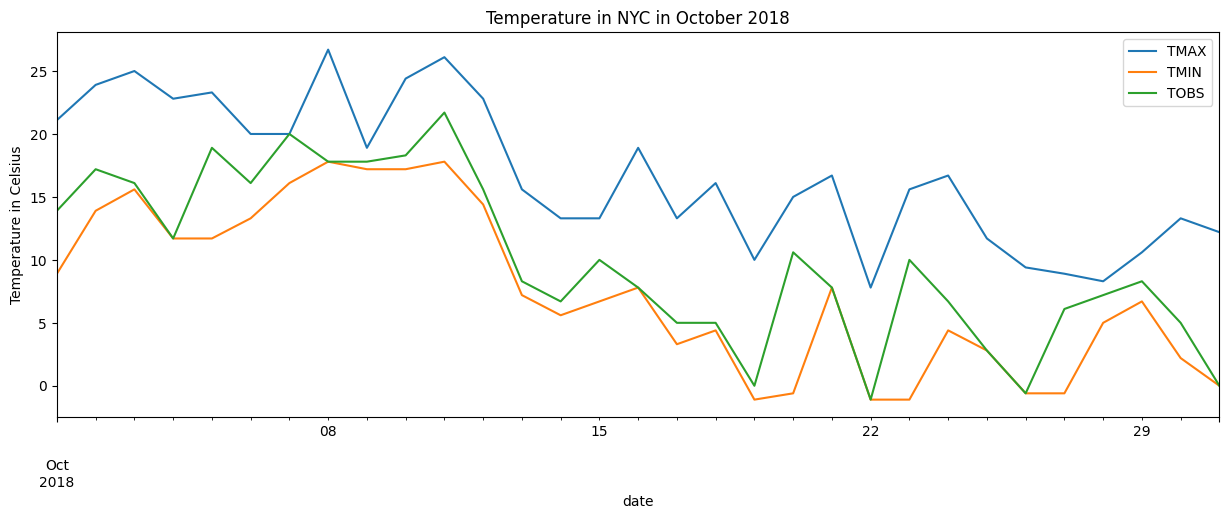

In [5]:
wide_df.plot(
    x='date', y=['TMAX', 'TMIN', 'TOBS'], figsize=(15, 5), 
    title='Temperature in NYC in October 2018'
).set_ylabel('Temperature in Celsius')
plt.show()

## Formato Longo
Os nomes das nossas variáveis agora estão na coluna `datatype` e seus valores estão na coluna `value`. Agora temos 3 linhas para cada data, pois temos 3 diferentes `datatypes`:

In [6]:
long_df.head(6)

,date,datatype,value
0,2018-10-01,TMAX,21.1
1,2018-10-01,TMIN,8.9
2,2018-10-01,TOBS,13.9
3,2018-10-02,TMAX,23.9
4,2018-10-02,TMIN,13.9
5,2018-10-02,TOBS,17.2


Como temos muitas linhas para a mesma data, usar `describe()` não é tão útil:

In [8]:
long_df.describe(include='all')

,date,datatype,value
count,93,93,93.000000
unique,NaN,3,NaN
top,NaN,TMAX,NaN
freq,NaN,31,NaN
mean,2018-10-16 00:00:00,NaN,11.470968
min,2018-10-01 00:00:00,NaN,-1.100000
25%,2018-10-08 00:00:00,NaN,6.700000
50%,2018-10-16 00:00:00,NaN,11.700000
75%,2018-10-24 00:00:00,NaN,17.200000
max,2018-10-31 00:00:00,NaN,26.700000


Plotar dados em formato longo com `pandas` pode ser bastante complicado. Em vez disso, usamos `seaborn` (abordado em [`ch_06/1-introduction_to_seaborn.ipynb`](../ch_06/1-introduction_to_seaborn.ipynb)):

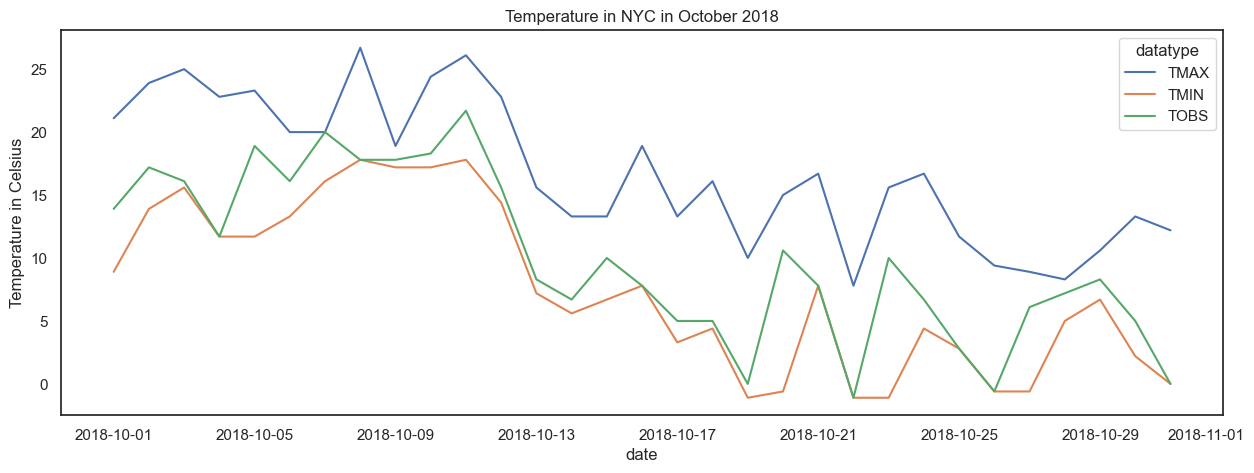

In [9]:
import seaborn as sns

sns.set(rc={'figure.figsize': (15, 5)}, style='white')

ax = sns.lineplot(
    data=long_df, x='date', y='value', hue='datatype'
)
ax.set_ylabel('Temperature in Celsius')
ax.set_title('Temperature in NYC in October 2018')
plt.show()

Com dados em formato longo e `seaborn`, podemos facilmente criar facetas em nossos gráficos:

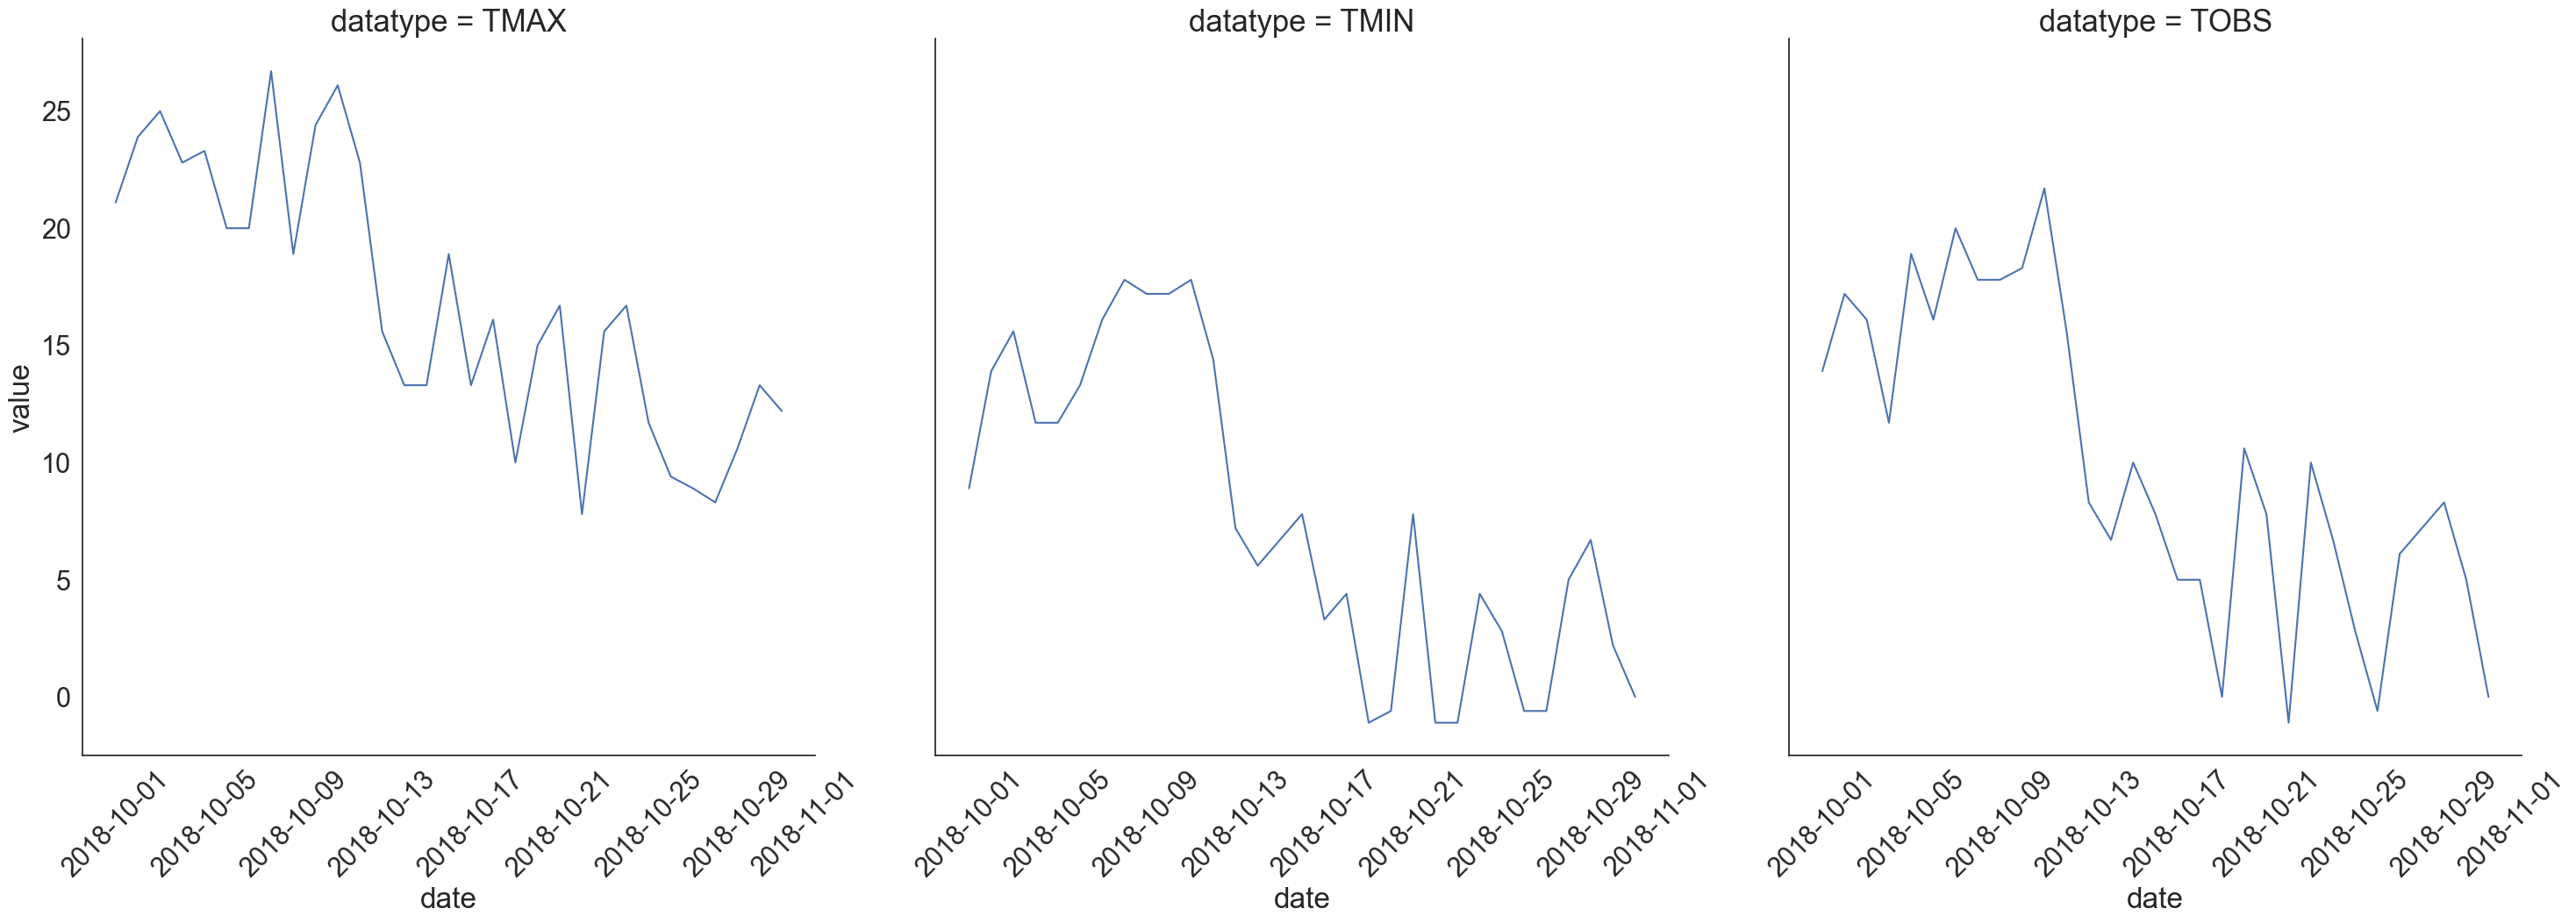

In [10]:
sns.set(
    rc={'figure.figsize': (20, 10)}, style='white', font_scale=2
)

g = sns.FacetGrid(long_df, col='datatype', height=10)
g = g.map(plt.plot, 'date', 'value')
g.set_titles(size=25)
g.set_xticklabels(rotation=45)
plt.show()

<hr>
<div>
    <a href="../ch_02/6-adding_and_removing_data.ipynb">
        <button style="float: left;">&#8592; Chapter 2</button>
    </a>
    <a href="./2-using_the_weather_api.ipynb">
        <button style="float: right;">Next Notebook &#8594;</button>
    </a>
</div>
<br>
<hr>